In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydevice = qml.device("default.qubit", wires=1)
@qml.qnode(mydevice)
def quantum_circuit():
    qml.Hadamard(wires=0)
    return qml.state()

result = quantum_circuit()
print(result)
print(result[0])
print(result[1])


[0.70710678+0.j 0.70710678+0.j]
(0.7071067811865475+0j)
(0.7071067811865475+0j)


In [3]:
mydevice3 = qml.device("default.qubit", wires=3)
@qml.qnode(mydevice3)
def quantum_circuit3(x, y):
    qml.RX(x, wires=0)
    qml.RY(y, wires=1)
    m0 = qml.measure(0)
    m1 = qml.measure(1)
    qml.cond(~m0 & m1 == 0, qml.X)(wires=2)
    return qml.expval(qml.Z(2))

result = quantum_circuit3(np.pi/2, np.pi/2)
print(result)

-0.5000000000000002


In [4]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit1():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RY(np.pi/4, wires=0)
    qml.RZ(np.pi/8, wires=1)
    qml.PhaseShift(np.pi, wires=1)
    qml.PauliY(wires=1)
    qml.PauliZ(wires=1)
    return qml.state()


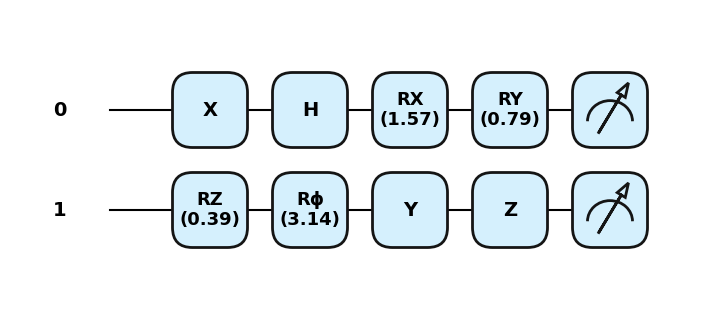

In [5]:
qml.draw_mpl(circuit1, decimals = 2, style = "pennylane")()
plt.show()

In [6]:
circuit1()

tensor([ 0.        +0.j        ,  0.51327997-0.76817776j,
         0.        +0.j        , -0.21260752+0.31818965j], requires_grad=True)

In [7]:
@qml.qnode(dev)
def circuit2():
    qml.Snapshot("before gate operations")
    qml.PauliX(wires=0)
    qml.Snapshot("after PauliX(0)")
    qml.Hadamard(wires=0)
    qml.Snapshot("after Hadamard(0)")
    qml.RX(np.pi/2, wires=0)
    qml.Snapshot("after RX(0)")
    qml.RY(np.pi/4, wires=0)
    qml.Snapshot("after RY(0)")
    qml.RZ(np.pi/8, wires=1)
    qml.Snapshot("after RZ(1)")
    qml.PhaseShift(np.pi, wires=1)
    qml.Snapshot("after PhaseShift(1)")
    qml.PauliY(wires=1)
    qml.Snapshot("after PauliY(1)")
    qml.PauliZ(wires=1)
    qml.Snapshot("after PauliZ(1)")
    return qml.state()

results = qml.snapshots(circuit2)()

for k, result in results.items():
    print(f"{k}: {result}")

before gate operations: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
after PauliX(0): [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
after Hadamard(0): [ 0.70710678+0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]
after RX(0): [ 0.5+0.5j  0. +0.j  -0.5-0.5j  0. +0.j ]
after RY(0): [ 0.65328148+0.65328148j  0.        +0.j         -0.27059805-0.27059805j
  0.        +0.j        ]
after RZ(1): [ 0.76817776+0.51327997j  0.        +0.j         -0.31818965-0.21260752j
  0.        +0.j        ]
after PhaseShift(1): [ 0.76817776+0.51327997j -0.        +0.j         -0.31818965-0.21260752j
 -0.        +0.j        ]
after PauliY(1): [ 0.        +0.j         -0.51327997+0.76817776j  0.        +0.j
  0.21260752-0.31818965j]
after PauliZ(1): [ 0.        +0.j          0.51327997-0.76817776j  0.        +0.j
 -0.21260752+0.31818965j]
execution_results: [ 0.        +0.j          0.51327997-0.76817776j  0.        +0.j
 -0.21260752+0.31818965j]


In [8]:
@qml.qnode(dev)
def circuit3():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RY(np.pi/4, wires=0)
    qml.RZ(np.pi/8, wires=1)
    qml.PhaseShift(np.pi, wires=1)
    qml.PauliY(wires=1)
    qml.PauliZ(wires=1)
    return qml.probs()

In [9]:
@qml.qnode(dev)
def circuit4():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RY(np.pi/4, wires=0)
    qml.RZ(np.pi/8, wires=1)
    qml.PhaseShift(np.pi, wires=1)
    qml.PauliY(wires=1)
    qml.PauliZ(wires=1)
    return qml.expval(qml.Z(0))

In [10]:
circuit1()

tensor([ 0.        +0.j        ,  0.51327997-0.76817776j,
         0.        +0.j        , -0.21260752+0.31818965j], requires_grad=True)

In [11]:
circuit3()

tensor([0.        , 0.85355339, 0.        , 0.14644661], requires_grad=True)

In [12]:
circuit4()

tensor(0.70710678, requires_grad=True)

In [13]:
dev_2 = qml.device("default.qubit", wires=2, shots=512)

@qml.qnode(dev_2)
def circuit5():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RY(np.pi/4, wires=0)
    qml.RZ(np.pi/8, wires=1)
    qml.PhaseShift(np.pi, wires=1)
    qml.PauliY(wires=1)
    qml.PauliZ(wires=1)
    return qml.counts(qml.Z(0))

In [14]:
circuit5()

{-1.0: 87, 1.0: 425}